<a href="https://colab.research.google.com/github/zar7364/DataScience/blob/main/Regression_Causality_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [6]:
data=("/content/drive/My Drive/Colab Notebooks/Regression Causality/Fish.csv")

In [4]:
import pandas as pd

In [7]:
df=pd.read_csv(data)

In [8]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [9]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [12]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [13]:
import seaborn as sns

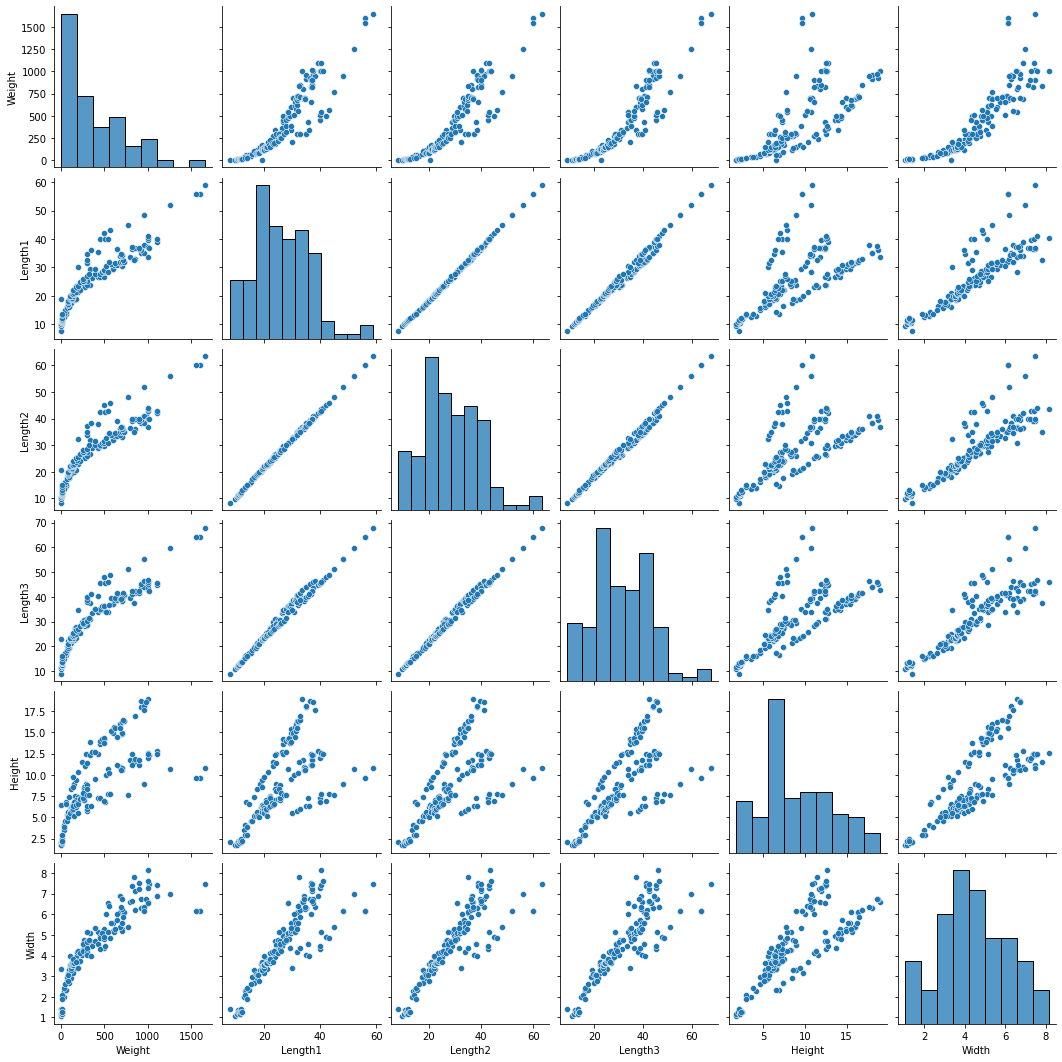

In [14]:
sns.pairplot(df)

In [16]:
data1=df.copy()

In [19]:
data1.drop('Species', axis=1,inplace=True)

In [27]:
import numpy as np
data1.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


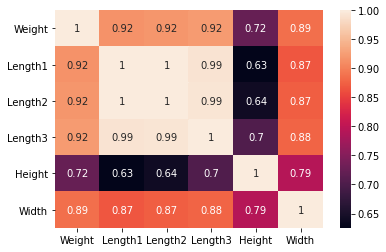

In [29]:
sns.heatmap(data1.corr(),annot=True)

In [48]:
#Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


#Split Data
X=data1.drop(['Weight'],axis=1)
Y=data1['Weight']

In [49]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=22)

In [51]:
#Fitting Model
regresi = RandomForestRegressor(n_estimators=100, random_state=0)
model=regresi.fit(X_train,Y_train)

In [56]:
Y_pred=model.predict(X_test)

In [60]:
#Use Linear Regression with OLS Method
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
model2=LR.fit(X_train,Y_train)

In [62]:
Y_Pred=model2.predict(X_test)

In [67]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [71]:
#Use Ordinary Least Square (OLS)
model3=sm.OLS(Y,X).fit()
prediction=model3.predict(X)
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                              179.7
Date:                Thu, 24 Dec 2020   Prob (F-statistic):                    2.24e-62
Time:                        03:15:47   Log-Likelihood:                         -1071.7
No. Observations:                 159   AIC:                                      2153.
Df Residuals:                     154   BIC:                                      2169.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Length1      202.0690     66.391      3.044      0.003      70.914     333.224
Length2      -89.5220     69.967     -1.279      0.203    -227.742      48.698
Length3      -82.6718     28.784     -2.872      0.005    -139.534     -25.809
Height        55.7740     14.470      3.854      0.000      27.188      84.360
Width        -51.1129     33.577     -1.522      0.130    -117.444      15.218
==============================================================================
Omnibus:                       59.832   Durbin-Watson:                   0.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.316
Skew:                           1.628   Prob(JB):                     7.57e-32
Kurtosis:                       6.322   Cond. No.                         310.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Variabel yang mempunyai pengaruh terhadap berat ikan yaitu Length1, Length3, Height karena mempunyai nilai p-value < 0.05.